# Validation and Convergence

In [1]:
# Amira Abdel-Rahman
# (c) Massachusetts Institute of Technology 2021

# tested using julia 1.5.2 and windows Nvidia geforce gtx 1070 Ti

In [2]:
plotting=true
GPU=false
logging=true
include("../julia/MetaVoxels.jl") #load MetaVoxels!

Loaded MetaVoxels Functions!


## Static

In [3]:
disX=[[],[],[],[],[],[],[],[],[]];
disXFEA=[[],[],[],[],[],[],[],[],[]];
disY=[[],[],[],[],[],[],[],[],[]];
disYFEA=[[],[],[],[],[],[],[],[],[]];
disZ=[[],[],[],[],[],[],[],[],[]];
disZFEA=[[],[],[],[],[],[],[],[],[]];
disXTime=[[],[],[],[],[],[],[],[],[]];
disYTime=[[],[],[],[],[],[],[],[],[]];
disZTime=[[],[],[],[],[],[],[],[],[]];
disXFEATime=[[],[],[],[],[],[],[],[],[]];
disYFEATime=[[],[],[],[],[],[],[],[],[]];
disZFEATime=[[],[],[],[],[],[],[],[],[]];

In [4]:
2122/22

96.45454545454545

In [65]:
timeCPU=[ 2.79, 11.5,30.45 , 65.4,169.2 ,310,324.45]; #4cores
timeFEA=[ 0.22, 0.469, 5.7, 23.97,137.01 ,611 ,2122.27];
timeGPU=[ 17.9, 18.3,19.7 ,19.4 , 20.2, 21.4,22]; #Nvidia geforce gtx 1070 Ti

numNodes=[ 12,54 ,144 , 300, 540,882 ,1344 ];
numEdges=[ 24,144 ,432 , 960, 1800,3024  ,4704 ];

# timesteps=[ , ,4000, , , ]
# load=[ -25,-33.3 ,-37.33,-40 ,-41.66 ,-42.85,-43.75]
# damping=[ ,0.001 ,0.001,0.001 , , ]

In [56]:
LS=1 #latticeSize

3

In [57]:
simName= "tutorial" # set name for simulation
# get a saved setup from an external julia file
# include("./julia/examples/thermalTest.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 
include("../julia/examples/latticeTest2.jl") #template for lattice voxel (big scale with real params)


## recompile these just for sanity check for dynamic loads
include("../julia/MetaVoxels.jl") 

#export setup using nodejs and javascript from "./json/$(simName)Init.json" and save to "./json/$(simName).json"
exportJuliaSettingsUsingNode(setup,simName)

Loaded MetaVoxels Functions!
Success! Created structure with 144 nodes and 432 edges.


Process(`node app1.js tutorial`, ProcessExited(0))

In [58]:
setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved

setupSimFEA=getSetup(simName);

In [61]:
runMetaVoxels!(setupSim,savedDataFolderPath,"GPU")

dt: 0.0014172978482250688, s: 53.033008588991066, mass: 8.4112048678, momentInertiaInverse: 0.08769169
first timestep took 0.000607699 seconds
ran 144 nodes and 432 edges for 50000 time steps took 18.5211723 seconds


In [60]:
t=@timed setupSimFEA=solveFea(setupSimFEA);
time=t[2]
println("FEA took $time seconds")

FEA took 2.949550501 seconds


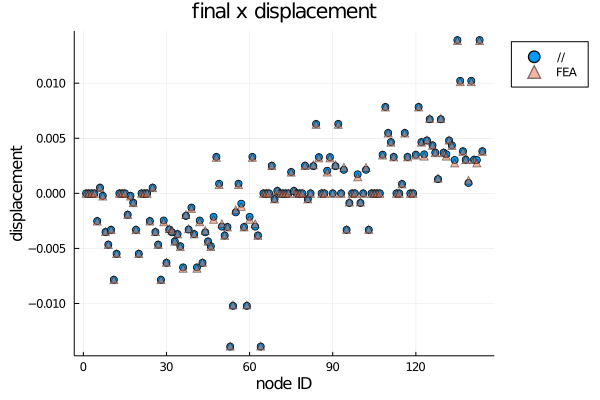

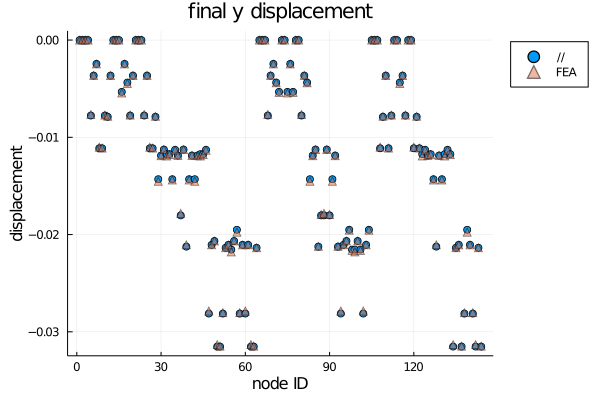

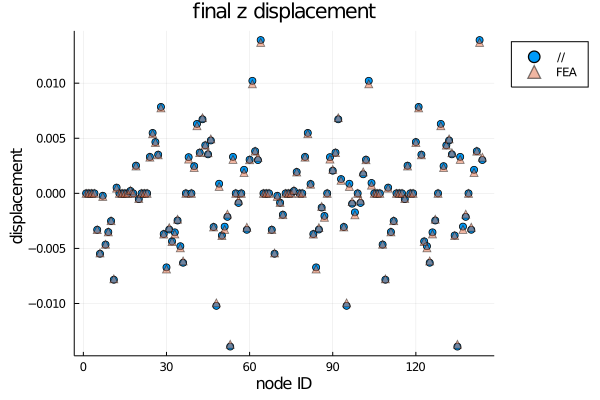

In [62]:
ro

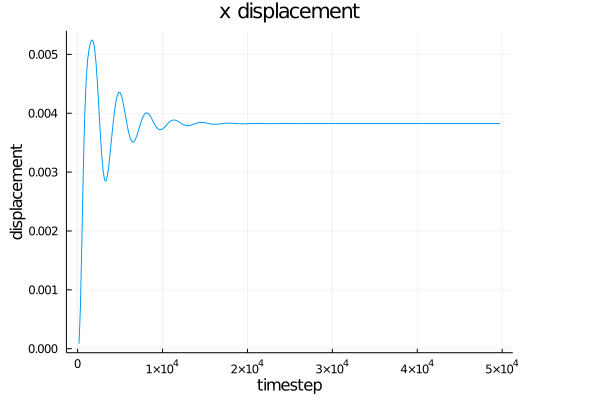

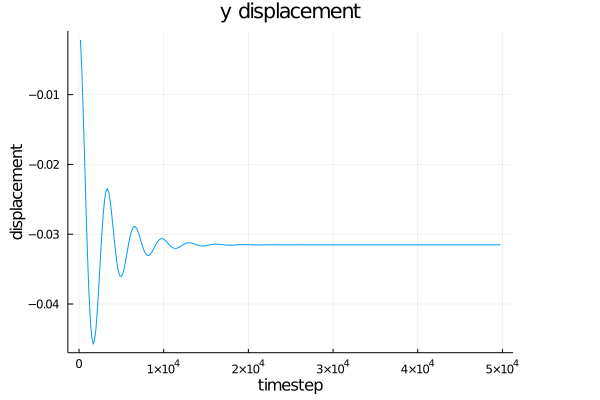

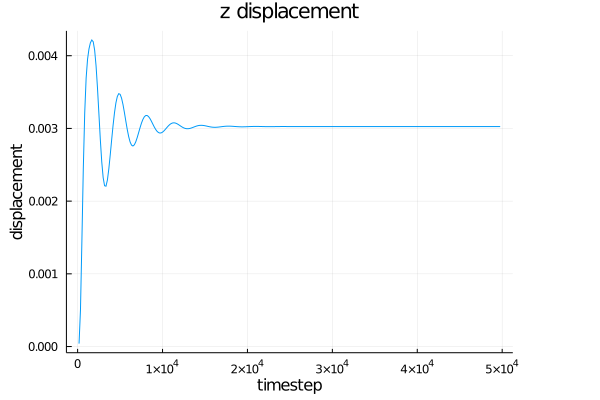

In [63]:
disXTime[LS],disYTime[LS],disZTime[LS]=plotDisplacementTroughTimeSteps(simName);
disXFEATime[LS]=fill(setupSimFEA["nodes"][end]["displacement"]["x"],setupSimFEA["maxNumFiles"]);
disYFEATime[LS]=fill(setupSimFEA["nodes"][end]["displacement"]["y"],setupSimFEA["maxNumFiles"]);
disZFEATime[LS]=fill(setupSimFEA["nodes"][end]["displacement"]["z"],setupSimFEA["maxNumFiles"]);

In [415]:
# maxNumFiles=300
# numTimeSteps=setupSim["numTimeSteps"]
# x=((1:maxNumFiles-2).*floor(numTimeSteps/maxNumFiles))
# i=2
# plot(x,disYTime[i][1:length(x)],label="$i*$i*$i //",xlabel="Timesteps",ylabel="Y displacement",legend = :outertopright)
# plot!(x,disYFEATime[i][1:length(x)],label="$i*$i*$i FEA")
# for i in 3:7
#     plot!(x,disYTime[i][1:length(x)],label="$i*$i*$i //")
#     plot!(x,disYFEATime[i][1:length(x)],label="$i*$i*$i FEA")
# end
# plot!()

In [332]:
# open("disXTime.txt","a") do io
#    println(io,"disXTime=",disZTime)
# end

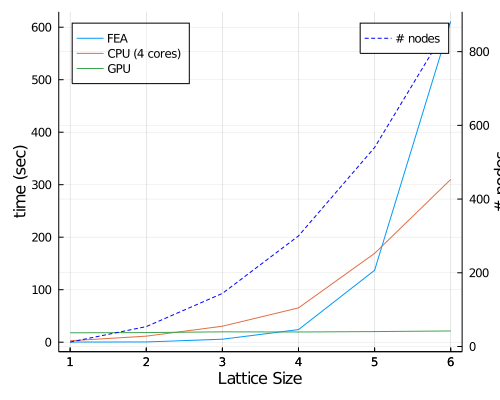

In [120]:
plot( timeFEA[1:6],xlabel="Lattice Size",ylabel="time (sec)",label="FEA",legend=:topleft)
plot!(timeCPU[1:6],label="CPU (4 cores)")
plot!(timeGPU[1:6],label="GPU")
plot!(twinx(),numNodes[1:6],label="# nodes",linestyle=:dash, ylabel="# nodes",legend=:topright,color=:blue)
plot!(size=(500,400))
# plot!(twinx(),numNodes[1:6],label="# nodes",linestyle=:dash, ylabel="number of Nodes",legend=:topright)
# plot!(numEdges[1:6],label="#edges",linestyle=:dash, ylabel="#",legend=:left)

## Dynamic

In [70]:
using CSV;
using DataFrames;


In [118]:
nodesPhys=fill(0.0,10,12,2)

for t=5:5:60
    file="../julia/examples/CAD_Rhino/tendon_data/$(t)mmstrain.csv"
    df = CSV.File(file,header=false) |> DataFrame
    for i=1:10
        nodesPhys[Int(df[i,1]),Int(t/5),1]=df[Int(i),2];#x
        nodesPhys[Int(df[i,1]),Int(t/5),2]=df[Int(i),3];#y
    end
end

In [242]:
simName="tutorial"

# get a saved setup from an external julia file
# include("./julia/examples/thermalTest.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 
include("../julia/examples/tendon.jl") #template for lattice voxel (big scale with real params)


## recompile these just for sanity check for dynamic loads
include("../julia/MetaVoxels.jl") 

#export setup using nodejs and javascript from "./json/$(simName)Init.json" and save to "./json/$(simName).json"
exportJuliaSettingsUsingNode(setup,simName)

Loaded MetaVoxels Functions!
Success! Created structure with 44 nodes and 109 edges.


Process(`node app1.js tutorial`, ProcessExited(0))

In [243]:
setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim,savedDataFolderPath,"CPU")

dt: 0.0014172978482285626, s: 75.0, mass: 11.89524, momentInertiaInverse: 0.08769169
first timestep took 0.6121703 seconds
ran 44 nodes and 109 edges for 80000 time steps took 27.3010215 seconds


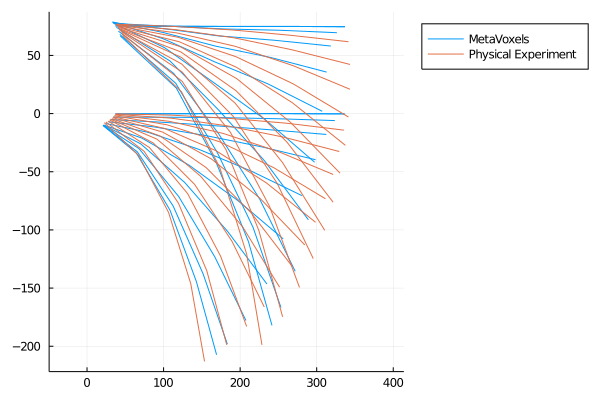

In [244]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28*1.4 temp 1 40000 then 80000

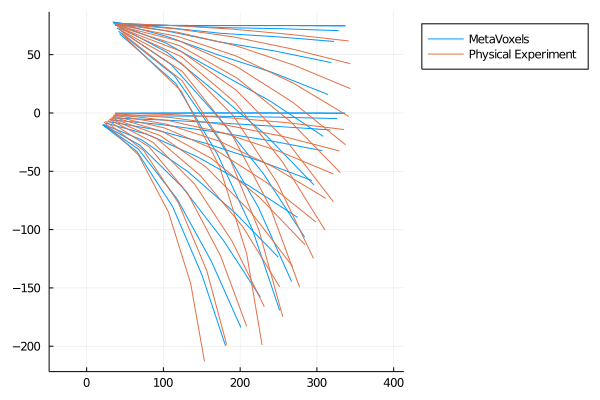

In [241]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28*1.4 temp 1 50000 then 80000

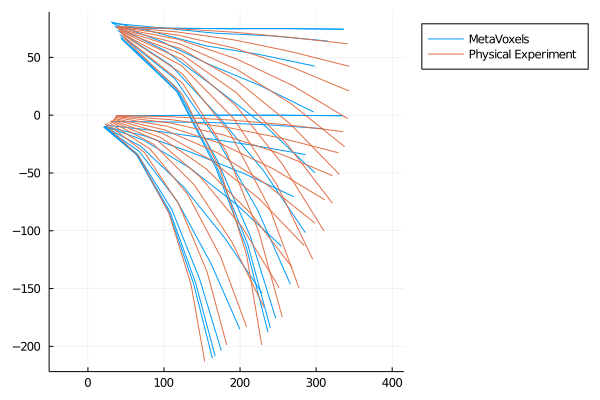

In [235]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28*1.4 temp 1 20000 then 80000

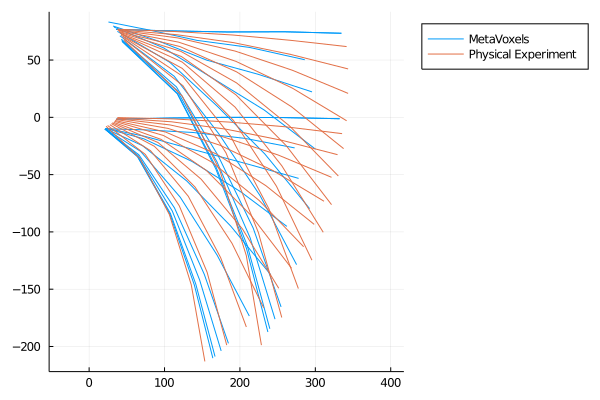

In [232]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28*1.4 temp 1 8000 then 80000

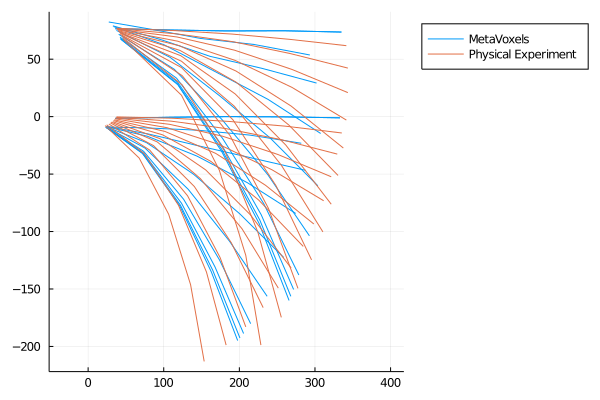

In [225]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28*1.2 temp 1 8000 then 80000

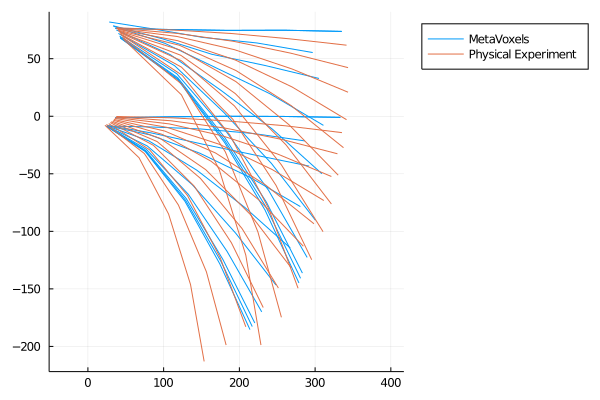

In [222]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28*1.1 temp 1 8000 then 80000

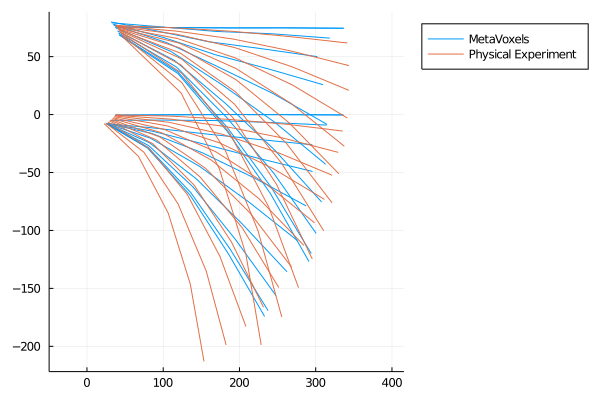

In [173]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 10000 then 100000

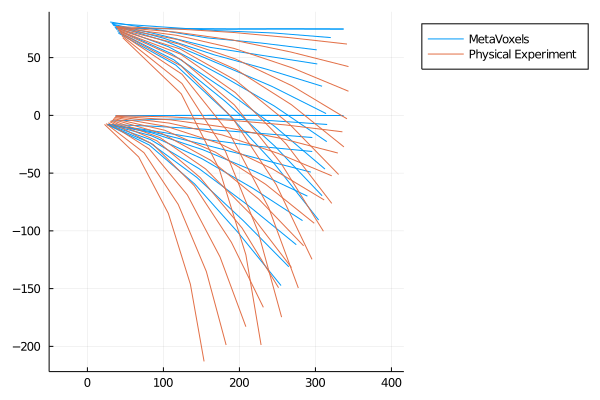

In [170]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 10000 then 50000

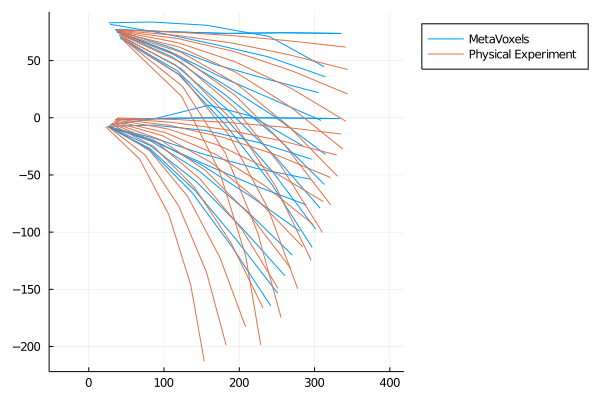

In [167]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 1000 then 50000

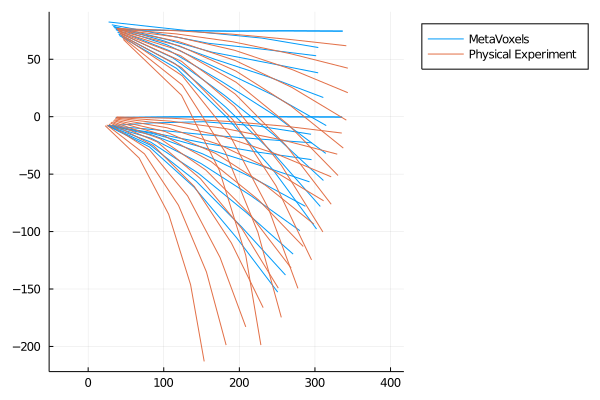

In [156]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 5000 then 50000

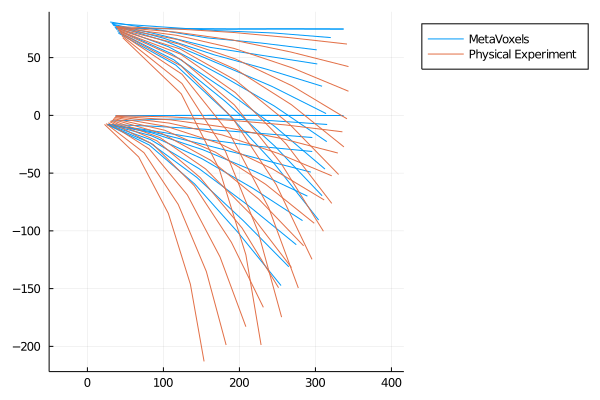

In [153]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 10000 then 50000

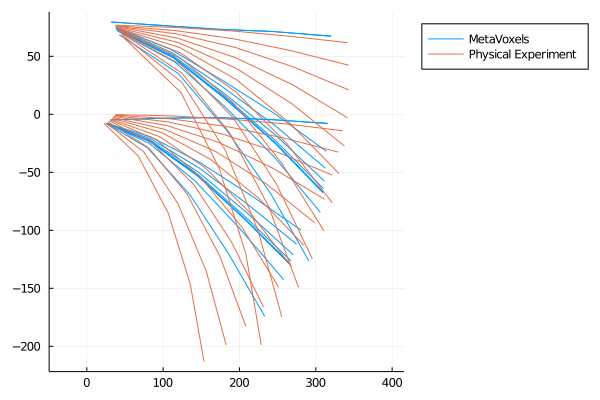

In [147]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 10000 then 30000

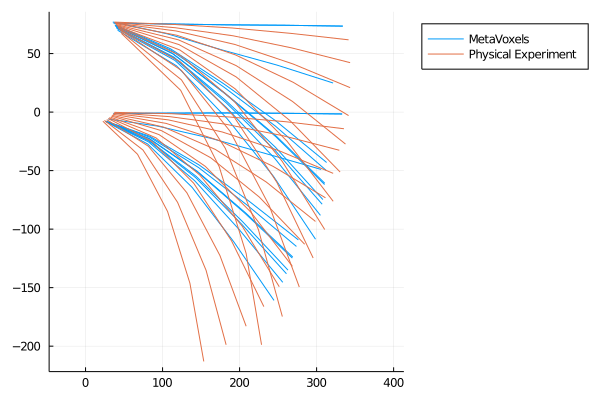

In [144]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 50000 then 30000

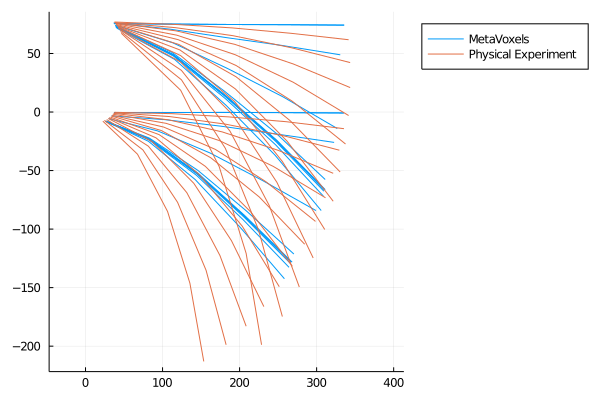

In [141]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 100000 then 30000

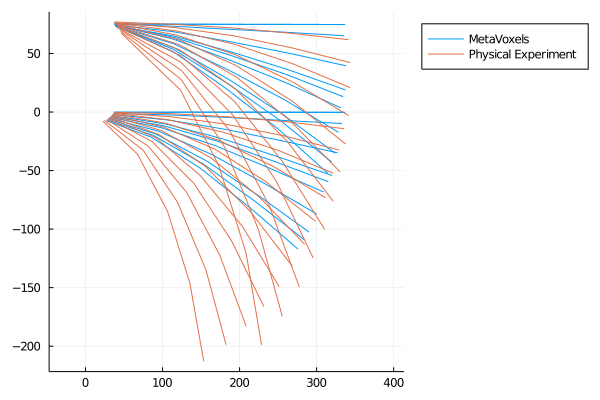

In [138]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.000001 28 temp 1 300000

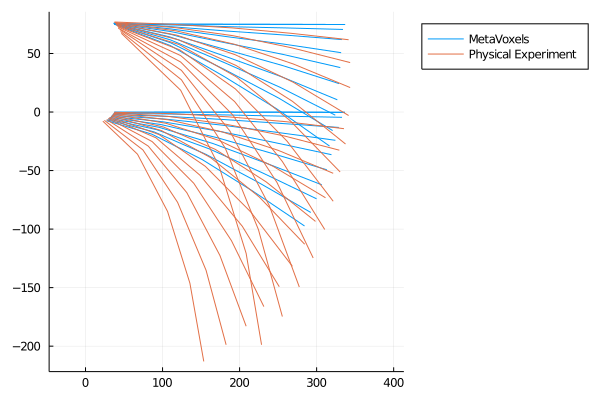

In [134]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.001 28 temp 1 300000

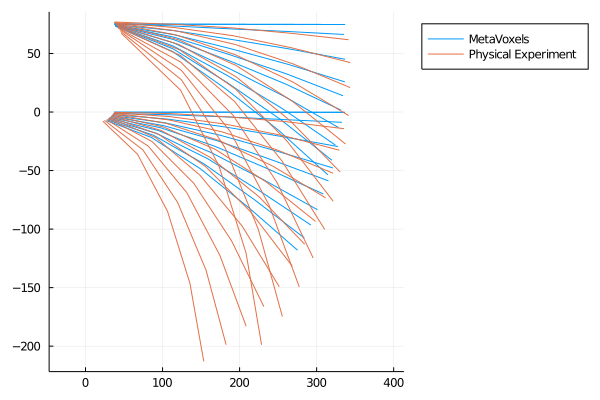

In [127]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.0001 28 temp 1 300000

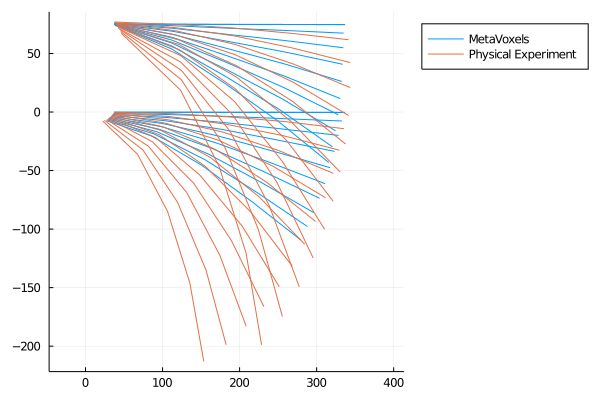

In [117]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.001 28 temp 1 600000

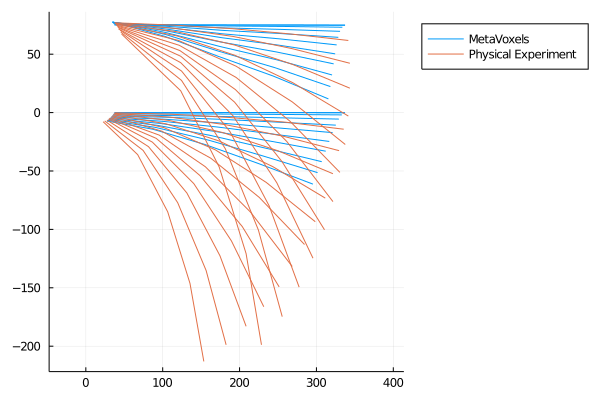

In [114]:
plotDetailedTendonVSphysical(simName,nodesPhys)# damp=0.001 28 temp 1  100000

In [111]:
plotDetailedTendonVSphysical(simName,nodesPhys)# 33 temp 2

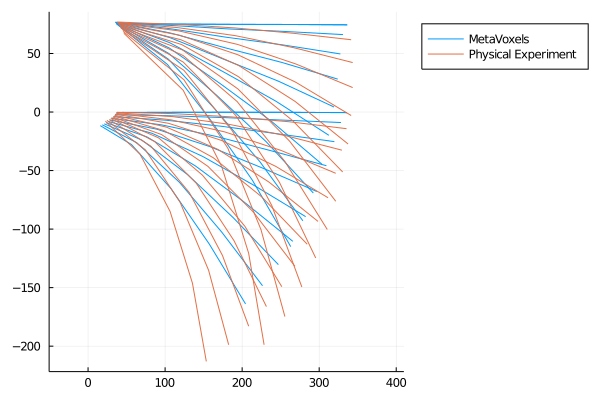

In [108]:
plotDetailedTendonVSphysical(simName,nodesPhys)# 28

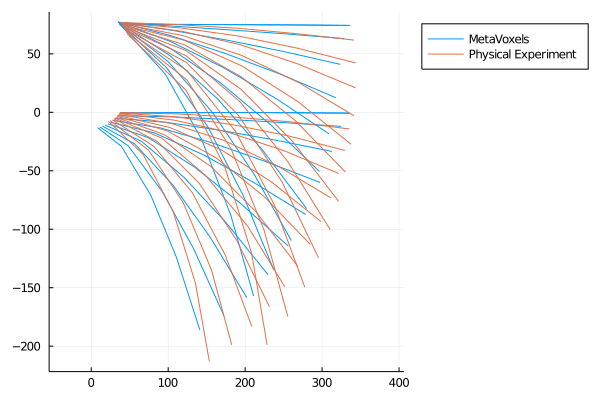

In [100]:
plotDetailedTendonVSphysical(simName,nodesPhys) #38 damping 0.001 temp=2 and 300000 

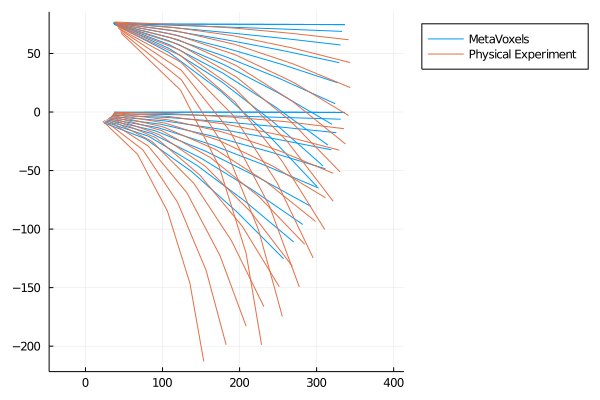

In [103]:
plotDetailedTendonVSphysical(simName,nodesPhys)  #damping 0.001 temp=1 and 300000

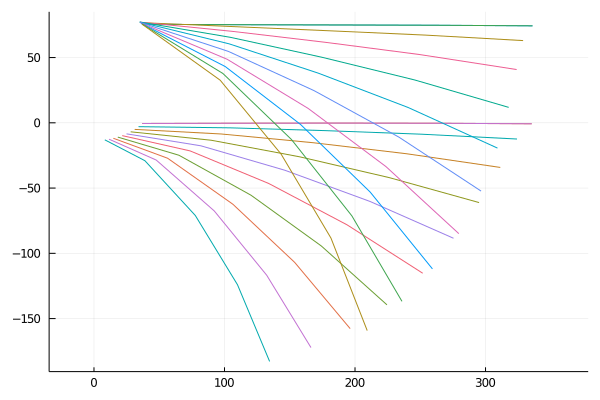

In [75]:
plotDetailedTendon(simName) #damping 0.001 temp=1 and 300000 


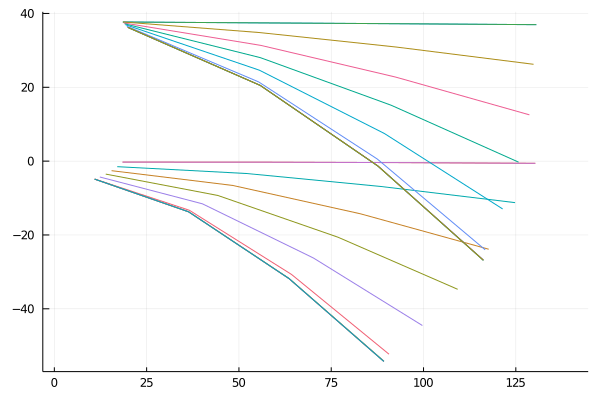

In [59]:
plotDetailedTendon(simName) #damping 0.001 temp=1 and 600000 


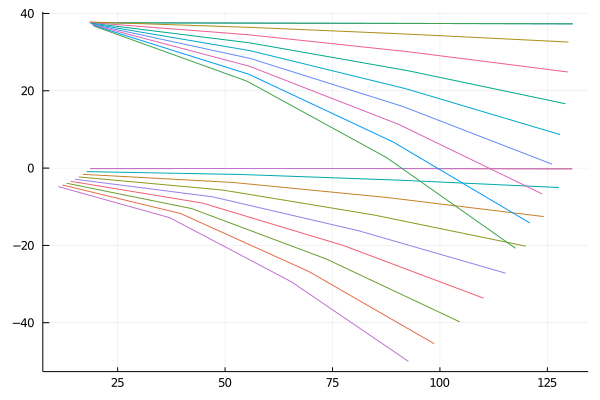

In [54]:
plotDetailedTendon(simName) #damping 0.001 temp=1  and 300000 (no wait afterwards)


## Multiscale

In [3]:
simName="tutorial"


# include("../julia/examples/multiscale/multiscale_1.jl") #multiscale  detailed
# include("../julia/examples/multiscale/multiscale_2.jl") #multiscale  abstracted
include("../julia/examples/multiscale/multiscale_3.jl") #multiscale
# include("../julia/examples/multiscale/multiscale_4.jl") #multiscale compare 2 and 3

## recompile these just for sanity check for dynamic loads
include("../julia/MetaVoxels.jl") 

#export setup using nodejs and javascript from "./json/$(simName)Init.json" and save to "./json/$(simName).json"
exportJuliaSettingsUsingNode(setup,simName)

Loaded MetaVoxels Functions!
Success! Created structure with 65 nodes and 85 edges.


Process(`node ../node/app1.js tutorial`, ProcessExited(0))

In [116]:
#detailed
setupSim1=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim1,savedDataFolderPath,"CPU")

dt: 4.33254712560697e-7, s: 53.033008588991066, mass: 7.86e-7, momentInertiaInverse: 938383.44109061
first timestep took 0.5927269 seconds
ran 320 nodes and 980 edges for 50000 time steps took 62.8813915 seconds


In [160]:
#abstract
setupSim2=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim2,savedDataFolderPath,"CPU")

dt: 1.4235251564292887e-5, s: 0.001, mass: 8.0e-6, momentInertiaInverse: 1.8749999999999997e11
first timestep took 0.591855301 seconds
ran 62 nodes and 127 edges for 1000 time steps took 0.5193242 seconds


In [186]:
#multiscale
setupSim3=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim3,savedDataFolderPath,"CPU")

dt: 1.4235251564292887e-5, s: 0.001, mass: 8.0e-6, momentInertiaInverse: 1.8749999999999997e11
first timestep took 0.617239601 seconds
ran 65 nodes and 85 edges for 1000 time steps took 0.388593799 seconds


In [179]:
include("../julia/MetaVoxels.jl") 


Loaded MetaVoxels Functions!


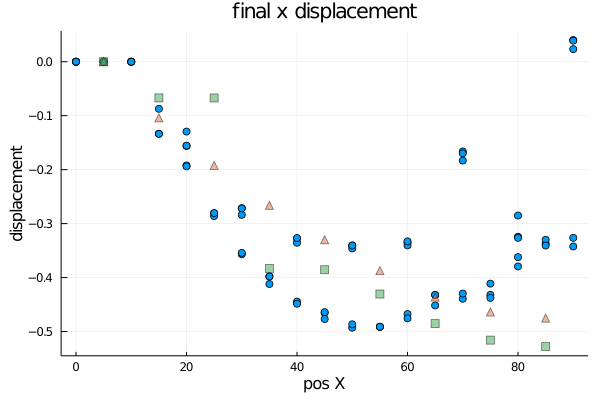

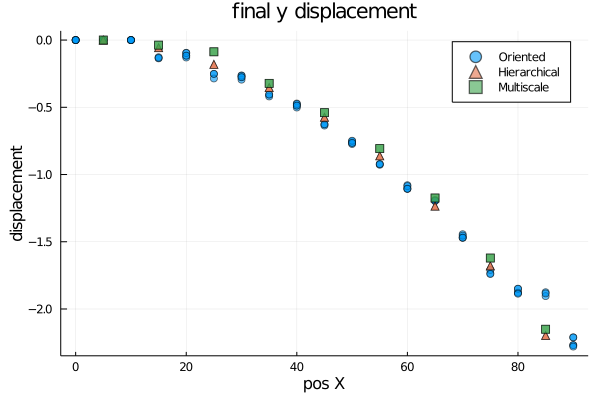

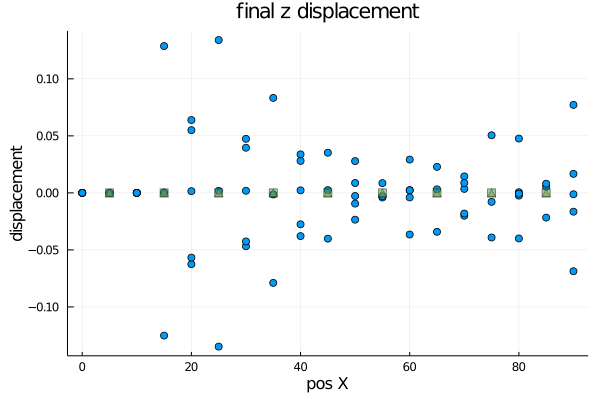

In [180]:
plotFinalDisplacementComparison(setupSim1,setupSim2,setupSim3)

## Robotic

In [56]:
simName="tutorial"
setup=[]

# get a saved setup from an external julia file
# include("./julia/examples/rover.jl")
# include("./julia/examples/puppy.jl")
include("../julia/examples/walkingRobot.jl")

## recompile these just for sanity check for dynamic loads
include("../julia/MetaVoxels.jl") 

setup["maxNumFiles"]=100;

#export setup using nodejs and javascript from "./json/$(simName)Init.json" and save to "./json/$(simName).json"
exportJuliaSettingsUsingNode(setup,simName)

Loaded MetaVoxels Functions!
Success! Created structure with 68 nodes and 132 edges.


Process(`node app1.js tutorial`, ProcessExited(0))

In [17]:
# setupSim=[]
# setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
# savedDataFolderPath="./json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
# runMetaVoxels!(setupSim,savedDataFolderPath,"GPU")

In [100]:
setupSim=[]
setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim,savedDataFolderPath,"CPU")

dt: 1.4235251564292888e-6, s: 0.001, mass: 4.0e-7, momentInertiaInverse: 3.75e12
first timestep took 4.4880223 seconds
ran 68 nodes and 132 edges for 10000 time steps took 9.054265699 seconds


In [95]:
getFinalDisplacement(simName,1,"z")

0.05390497361288474

### Get data from WANN

In [57]:
using DelimitedFiles
# res=readdlm("./WANN/results/rover/1_29.out", ' ','\n')
# res=readdlm("./WANN/results/rover/0_6.out", ' ','\n')
res=readdlm("../WANN/results/rover/0_6_good.out", ' ','\n')



strY=res[1,:];
strZ=res[2,:];
plot(strY[1:100])
plot!(strZ[1:100])

# strX=res[1,:];
# strY=res[2,:];
# strZ=res[3,:];
# strK=res[4,:];
# plot( strX[1:1000])
# plot!(strY[1:1000])
# plot!(strZ[1:1000])
# plot!(strK[1:1000])

In [58]:
setupSim=[]
setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim,savedDataFolderPath,"CPU")

dt: 3.183099017456911e-6, s: 0.001, mass: 4.0e-7, momentInertiaInverse: 3.75e12
first timestep took 0.7742794 seconds
ran 68 nodes and 132 edges for 10000 time steps took 12.4617154 seconds
